## Example notebook to use BHPTNRSur1dq1e4-gwNRHME model

BHPTNRSur1dq1e4-gwNRHME (multi-modal eccentric nonspinning model) = EccentricIMR (22 mode eccentric nonspinning model)  + BHPTNRSur1dq1e4 (multi-modal circular nonspinning model) + gwNRHME framework

In [1]:
import warnings
warnings.filterwarnings("ignore", "Wswiglal-redir-stdio")
import matplotlib.pyplot as plt
import numpy as np

# import gwModels
import sys
PATH_TO_GWMODELS = "/Users/tousifislam/Documents/work/gwModels/" #"/home/tousifislam/Documents/works/git_repos/gwModels/"
sys.path.append(PATH_TO_GWMODELS)
import gwModels

lal.MSUN_SI != Msun
__name__ = gwsurrogate.new.spline_evaluation
__package__= gwsurrogate.new
Loaded NRHybSur3dq8 model


### Setup your mathematica kernel

In [2]:
# Set the path to your Wolfram kernel
# wolfram_kernel_path = '/home/tousifislam/Documents/Mathematica/ScriptDir/WolframKernel'
wolfram_kernel_path =  '/Applications/Wolfram.app/Contents/MacOS/WolframKernel'

# Set the path to the directory containing the EccentricIMR package
package_directory = PATH_TO_GWMODELS + '/externals/EccentricIMR2017/'

In [3]:
import gwsurrogate
# setup model for BHPTNRSur1dq1e4
# path_to_gws = '/home/tousifislam/miniconda3/envs/eccentric/lib/python3.9/site-packages/gwsurrogate/'
path_to_gws = '/Users/tousifislam/miniconda3/envs/gweccphenom/lib/python3.10/site-packages/gwsurrogate/'
path_to_surrogate = path_to_gws+'surrogate_downloads/BHPTNRSur1dq1e4.h5'
model_obj = gwsurrogate.EvaluateSurrogate(path_to_surrogate, ell_m=[(2,2),(2,1),(3,1),(3,2),(3,3),(4,2),(4,3),(4,4),(5,3),(5,4),(5,5)]) 

loading surrogate mode... l2_m2

>>> Found surrogate ID from file name: BHPTNRSur1dq1e4

>>> Warning: Guessing quadrature weights to be identical with 0.200000
Cannot load greedy points...OK
Special case: using spline for parametric model at each EI node
num_fits_amp = 7
num_fits_phase = 7
setting norm fitparams to None...
loading surrogate mode... l2_m1

>>> Found surrogate ID from file name: BHPTNRSur1dq1e4

>>> Warning: Guessing quadrature weights to be identical with 0.200000
Cannot load greedy points...OK
Special case: using spline for parametric model at each EI node
num_fits_re = 13
num_fits_im = 13
setting norm fitparams to None...
loading surrogate mode... l3_m1

>>> Found surrogate ID from file name: BHPTNRSur1dq1e4

>>> Warning: Guessing quadrature weights to be identical with 0.200000
Cannot load greedy points...OK
Special case: using spline for parametric model at each EI node
num_fits_re = 13
num_fits_im = 13
setting norm fitparams to None...
loading surrogate mode... l3_

### Generate waveforms from combined eccentric models

In [4]:
# Set the binary parameters
params = {"q": 2.6, # mass ratio
          "x0": 0.07, # reference initial dimensionless orbital frequency
          "e0": 0.1, # initial eccentricity
          "l0": 0, # initial mean anomaly
          "phi0": 0, # initial reference phase
          "t0": 0} # some initial reference time - not much relevant for us

In [5]:
# instantiate the EccentricIMR HM class - it may take some time
# it generate waveforms by combining EccentricIMR and BHPTNRSur1dq1e4
wf = gwModels.models.BHPTNRSur1dq1e4_gwNRHME(eccentric_model='EccentricIMR',
                                             wolfram_kernel_path=wolfram_kernel_path, 
                                             package_directory=package_directory, 
                                             model_obj=model_obj)

# waveform
tNRE, hNRE = wf.generate_waveform(params)

s1z not found in params. Setting s1z to zero.
s2z not found in params. Setting s2z to zero.


Times[1.0, 0] is too small to represent as a normalized machine number; precision may be lost.
Times[1.0, 0] is too small to represent as a normalized machine number; precision may be lost.
Times[1.0, 0] is too small to represent as a normalized machine number; precision may be lost.
Further output of MessageName[General, munfl] will be suppressed during this calculation.
Times[1.0, 0] is too small to represent as a normalized machine number; precision may be lost.
Times[1.0, 0] is too small to represent as a normalized machine number; precision may be lost.
Times[1.0, 0] is too small to represent as a normalized machine number; precision may be lost.
Times[1.0, 0] is too small to represent as a normalized machine number; precision may be lost.
Further output of MessageName[General, munfl] will be suppressed during this calculation.
Times[1.0, 0] is too small to represent as a normalized machine number; precision may be lost.


..... scipy.integrate.cumtrapz is no longer supported by your environment; using newer module scipy.integrate.cumulative_trapezoid
..... scipy.integrate.cumtrapz is no longer supported by your environment; using newer module scipy.integrate.cumulative_trapezoid
..... scipy.integrate.cumtrapz is no longer supported by your environment; using newer module scipy.integrate.cumulative_trapezoid
..... scipy.integrate.cumtrapz is no longer supported by your environment; using newer module scipy.integrate.cumulative_trapezoid
..... scipy.integrate.cumtrapz is no longer supported by your environment; using newer module scipy.integrate.cumulative_trapezoid


In [6]:
# print available modes
print(hNRE.keys())

dict_keys(['h_l2m2', 'h_l2m1', 'h_l3m3', 'h_l3m2', 'h_l4m4', 'h_l4m3'])


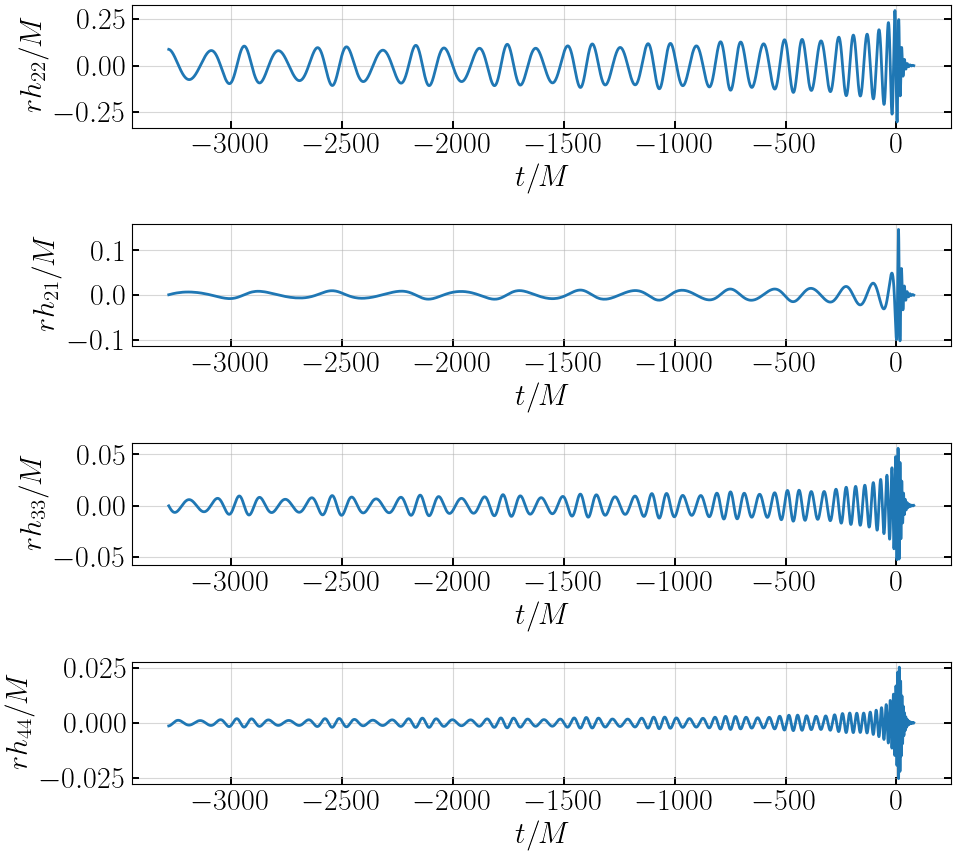

In [7]:
# plot waveform
plt.figure(figsize=(10,9))
plt.subplot(411)
plt.plot(tNRE, hNRE['h_l2m2'], '-', lw=2, label='EccentricIMR')
plt.xlabel('$t/M$')
plt.ylabel('$rh_{22}/M$')
plt.subplot(412)
plt.plot(tNRE, hNRE['h_l2m1'], '-', lw=2, label='EccentricIMR')
plt.xlabel('$t/M$')
plt.ylabel('$rh_{21}/M$')
plt.subplot(413)
plt.plot(tNRE, hNRE['h_l3m3'], '-', lw=2, label='EccentricIMR')
plt.xlabel('$t/M$')
plt.ylabel('$rh_{33}/M$')
plt.subplot(414)
plt.plot(tNRE, hNRE['h_l4m4'], '-', lw=2, label='EccentricIMR')
plt.xlabel('$t/M$')
plt.ylabel('$rh_{44}/M$')
plt.tight_layout()
plt.show()